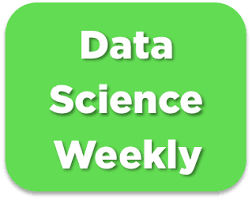

# Challenge : predict conversions 🏆🏆
In this project, you will participate to a machine learning competition like the ones that are organized by https://www.kaggle.com/. You will be able to work with jupyter notebooks as usual, but in the end you'll have to submit your model's predictions to your teacher/TA, so your model's performances will be evaluated in an independent way. The scores achieved by the different teams will be stored into a leaderboard 🏅🏅

## Description of a machine learning challenge 🚴🚴
- In machine learning challenges, the dataset is always separated into to files :
    - *data_train.csv* contains **labelled data**, which means there are both X (explanatory variables) and Y (the target to be predicted). You will use this file to train your model as usual : make the train/test split, preprocessings, assess performances, try different models, fine-tune hyperparameters etc...
    - *data_test.csv* contains "new" examples that have not be used to train the model, in the same format as in *data_train.csv* but it is **unlabeled**, which means the target Y has been removed from the file. Once you've trained a model, you will use *data_test.csv* to make some predictions that you will send to the organizing team. They will then be able to assess the performances of your model in an independent way, by preventing cheating 🤸
- Your model's predictions will be compared to the true labels and releases a leaderboard where the scores of all the teams around the world are stored
- All the participants are informed about the metric that will be used to assess the scores. You have to make sure you're using the same metric to evaluate your train/test performances !

## Company's Description 📇
www.datascienceweekly.org is a famous newsletter curated by independent data scientists. Anyone can register his/her e-mail address on this website to receive weekly news about data science and its applications !

## Project 🚧
The data scientists who created the newsletter would like to understand better the behaviour of the users visiting their website. They would like to know if it's possible to build a model that predicts if a given user will subscribe to the newsletter, by using just a few information about the user. They would like to analyze the parameters of the model to highlight features that are important to explain the behaviour of the users, and maybe discover a new lever for action to improve the newsletter's conversion rate.

They designed a competition aiming at building a model that allows to predict the *conversions* (i.e. when a user will subscribe to the newsletter). To do so, they open-sourced a dataset containing some data about the traffic on their website. To assess the rankings of the different competing teams, they decided to use the **f1-score**.

## Goals 🎯
The project can be cut into four steps :
- Part 1 : make an EDA and the preprocessings and train a baseline model with the file *data_train.csv*
- Part 2 : improve your model's f1-score on your test set (you can try feature engineering, feature selection, regularization, non-linear models, hyperparameter optimization by grid search, etc...)
- Part 3 : Once you're satisfied with your model's score, you can use it to make some predictions with the file *data_test.csv*. You will have to dump the predictions into a .csv file that will be sent to Kaggle (actually, to your teacher/TA 🤓). You can make as many submissions as you want, feel free to try different models !
- Part 4 : Take some time to analyze your best model's parameters. Are there any lever for action that would help to improve the newsletter's conversion rate ? What recommendations would you make to the team ?

## Deliverable 📬
To complete this project, your team should: 
- Create some relevant figures for EDA
- Train at least one model that predicts the conversions and evaluate its performances (f1, confusion matrices)
- Make at least one submission to the leaderboard 
- Analyze your best model's parameters and try to make some recommendations to improve the conversion rate in the future


## Helpers 🦮

To help you with the methodology, we created a template (**02-Conversion_rate_challenge_template.ipynb**) in which all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the EDA/preprocessing/training steps ! May the force be with you 🧨🧨 

In [1]:
!pip install plotly

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt


# 1) EDA

## 1-a) présentation de la data

In [2]:
conversion_train = pd.read_csv("conversion_data_train.csv")
conversion_train

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0
...,...,...,...,...,...,...
284575,US,36,1,Ads,1,0
284576,US,31,1,Seo,2,0
284577,US,41,1,Seo,5,0
284578,US,31,1,Direct,4,0


In [3]:
conversion_train.shape

(284580, 6)

In [4]:
conversion_train.converted.value_counts()

0    275400
1      9180
Name: converted, dtype: int64

## 1-b) Vérification de la présence de valeur manquante

In [5]:
dico_isnull = {c : len(conversion_train[conversion_train[c].isnull()== True]) for c in conversion_train.columns}
dico_isnull

{'country': 0,
 'age': 0,
 'new_user': 0,
 'source': 0,
 'total_pages_visited': 0,
 'converted': 0}

In [6]:
conversion_train.isnull().any()

country                False
age                    False
new_user               False
source                 False
total_pages_visited    False
converted              False
dtype: bool

## 1-c) Représentation graphique des données

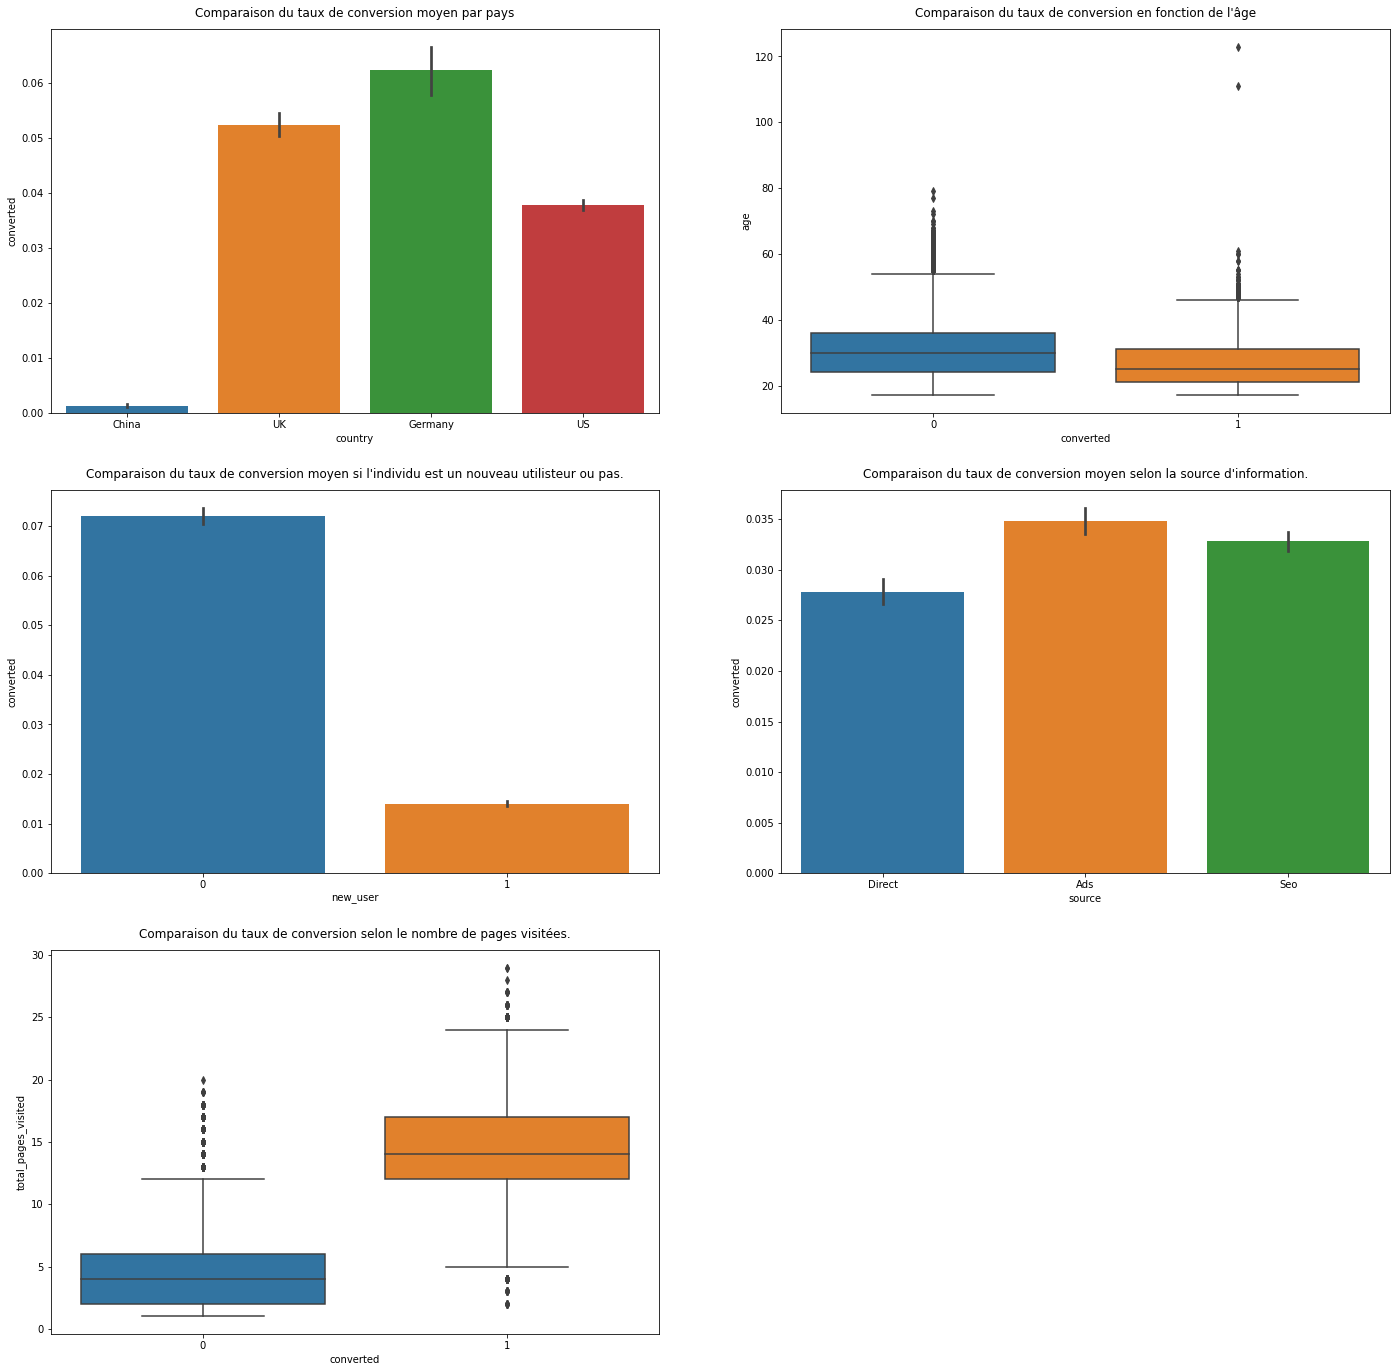

In [7]:
import seaborn as sns

plt.figure(figsize = (24, 24))

plt.subplot(3,2,1)

plt.title("Comparaison du taux de conversion moyen par pays", pad = 12)

sns.barplot(data = conversion_train, x = "country", y = "converted")

plt.subplot(3,2,2)

plt.title("Comparaison du taux de conversion en fonction de l'âge", pad = 12)

sns.boxplot(data = conversion_train, y = "age", x = "converted")

plt.subplot(3,2,3)

plt.title("Comparaison du taux de conversion moyen si l'individu est un nouveau utilisteur ou pas.", pad = 12)

sns.barplot(data = conversion_train, x= "new_user", y = "converted")


plt.subplot(3,2,4)

plt.title("Comparaison du taux de conversion moyen selon la source d'information.", pad = 12)

sns.barplot(data = conversion_train, x= "source", y = "converted")


plt.subplot(3,2,5)

plt.title("Comparaison du taux de conversion selon le nombre de pages visitées.", pad = 12)

sns.boxplot(data = conversion_train, y= "total_pages_visited", x = "converted");


## 1-d) Nettoyage de la donnée et representation graphique après le nettoyage de la données

In [8]:
conversion_train_new1 = conversion_train[conversion_train.age< 70]

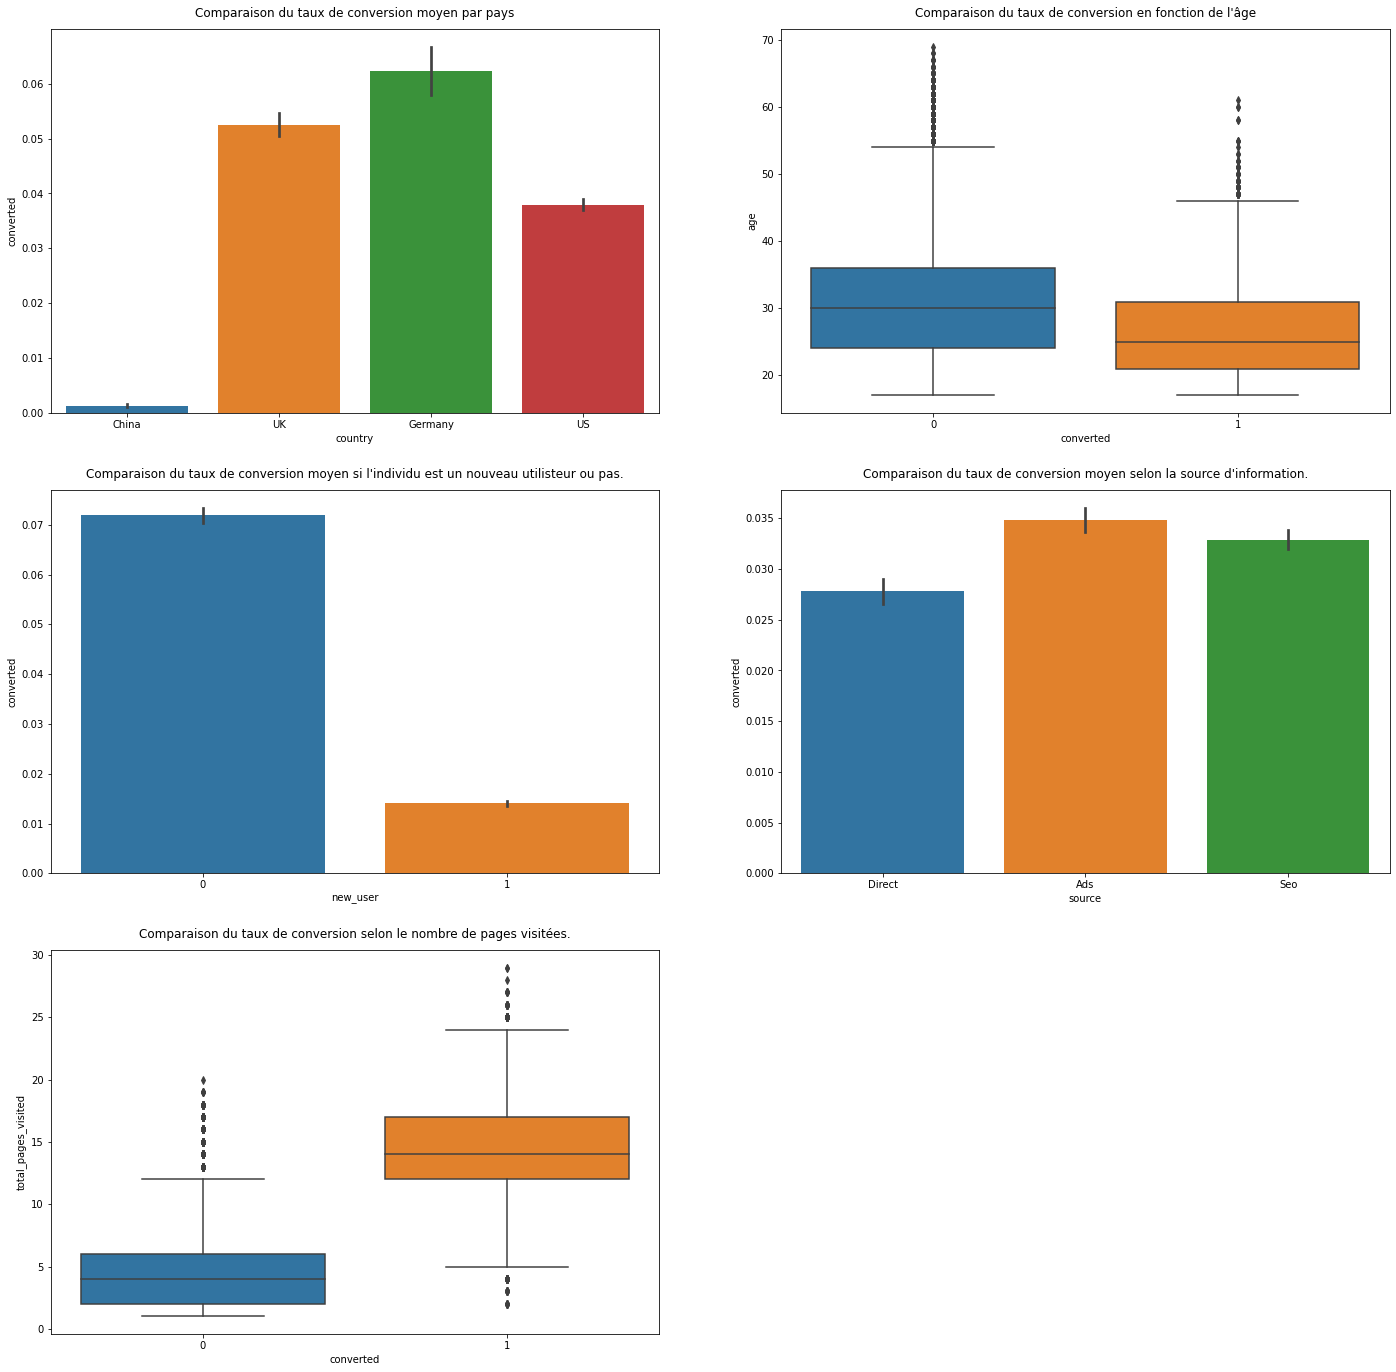

In [9]:
import seaborn as sns

plt.figure(figsize = (24, 24))

plt.subplot(3,2,1)

plt.title("Comparaison du taux de conversion moyen par pays", pad = 12)

sns.barplot(data = conversion_train_new1, x = "country", y = "converted")

plt.subplot(3,2,2)

plt.title("Comparaison du taux de conversion en fonction de l'âge", pad = 12)

sns.boxplot(data = conversion_train_new1, y = "age", x = "converted")

plt.subplot(3,2,3)

plt.title("Comparaison du taux de conversion moyen si l'individu est un nouveau utilisteur ou pas.", pad = 12)

sns.barplot(data = conversion_train_new1, x= "new_user", y = "converted")


plt.subplot(3,2,4)

plt.title("Comparaison du taux de conversion moyen selon la source d'information.", pad = 12)

sns.barplot(data = conversion_train_new1, x= "source", y = "converted")


plt.subplot(3,2,5)

plt.title("Comparaison du taux de conversion selon le nombre de pages visitées.", pad = 12)

sns.boxplot(data = conversion_train_new1, y= "total_pages_visited", x = "converted");


## 1-e) Modèle de machine learning

In [10]:
name = conversion_train_new1.columns[0:5]
name

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')

### Séparation des variables en X et y

In [11]:

X1= conversion_train_new1.loc[:,name]
y1 = conversion_train_new1.loc[:,"converted"]


### Séparation en train et test

In [12]:
print("Splitting dataset into train set and test set...")

## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=y1) # Allows you to stratify your sample. 
                                                                # Meaning, you will have the same
                                                                # proportion of categories in test 
                                                                # and train set

print("...Done.")                                                                


Splitting dataset into train set and test set...
...Done.


### Traitement en langage numérique X train et y train

In [13]:
# Encoding categorical features and standardizing numeric features
print("Encoding categorical features and standardizing numerical features...")
print()

numeric_features = [1,4]
numeric_transformer = StandardScaler()

categorical_features = [0,2,3]
categorical_transformer = OneHotEncoder() # ne pas mettre de drop "First" car donne des résultats très mauvais

feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
print("...Done.")
print(X_train[:5]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()

Encoding categorical features and standardizing numerical features...

...Done.
[[ 1.          0.          0.          0.          1.          0.
   0.          0.          1.         -0.43127269  0.33778588]
 [ 0.          0.          1.          0.          0.          1.
   0.          1.          0.          1.99023594  0.33778588]
 [ 1.          0.          0.          0.          0.          1.
   0.          0.          1.          1.99023594  0.33778588]
 [ 0.          0.          1.          0.          0.          1.
   1.          0.          0.         -1.39987614 -0.85887186]
 [ 0.          1.          0.          0.          0.          1.
   0.          0.          1.          1.50593421 -0.26054299]]



In [14]:
# Encoding labels
print("Encoding labels...")
print(y_train)
print()
labelencoder = LabelEncoder()
Y_train = labelencoder.fit_transform(y_train)
print("...Done.")
print(Y_train[:5]) # print first 5 rows (not using iloc since now y_train became a numpy array)
print()

Encoding labels...
139910    0
67725     0
131600    0
58434     0
77429     0
         ..
219931    1
28706     0
22584     0
207647    0
274494    0
Name: converted, Length: 227657, dtype: int64

...Done.
[0 0 0 0 0]



### Traitement en langage numérique X test

In [15]:
### Test pipeline ###
print("--- Test pipeline ---")


print(X_test)
print()
X_test = X_test.copy() # Copy dataset to avoid caveats of assign a copy of a slice of a DataFrame
                        # More info here https://towardsdatascience.com/explaining-the-settingwithcopywarning-in-pandas-ebc19d799d25
    
    
    
# Encoding categorical features and standardizing numeric features
print("Encoding categorical features and standardizing numerical features...")
print()

X_test = feature_encoder.transform(X_test)
print("...Done.")
print(X_test)
print()

--- Test pipeline ---
       country  age  new_user  source  total_pages_visited
102477      UK   44         0     Seo                    6
183477      US   34         0  Direct                    4
222045      US   34         0     Seo                    6
260768      US   20         1     Seo                    3
197606      US   19         1  Direct                    3
...        ...  ...       ...     ...                  ...
172883   China   18         1  Direct                    9
140405      US   44         0     Seo                    5
50429    China   39         0     Ads                    5
29715    China   34         0     Seo                    1
140535      US   25         0     Ads                    3

[56915 rows x 5 columns]

Encoding categorical features and standardizing numerical features...

...Done.
[[ 0.          0.          1.         ...  1.          1.62700965
   0.33778588]
 [ 0.          0.          0.         ...  0.          0.41625533
  -0.26054299]
 

### Modèle de base : Logistique regression

In [16]:
# Training model 
print("Training model...")
#classifier2 = LogisticRegression(random_state = 0,solver="saga",penalty="elasticnet",l1_ratio =0.1,class_weight= {0:5,1:10}) # Instanciate model
classifierlog = LogisticRegression(random_state = 0) # Instanciate model
classifierlog.fit(X_train, y_train) # Fit model
print("...Done.")

Training model...
...Done.


In [17]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifierlog.predict(X_train)
print("...Done.")
print()

Predictions on train set...
...Done.



In [18]:
# Predictions on training set
print("Predictions on test set...")
y_test_pred = classifierlog.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



f1-score on train set :  0.762170729866405


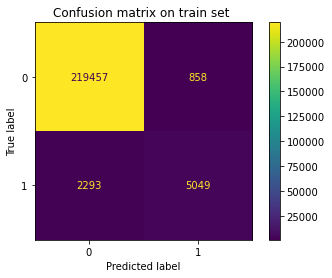

f1-score on test set :  0.768164003617727


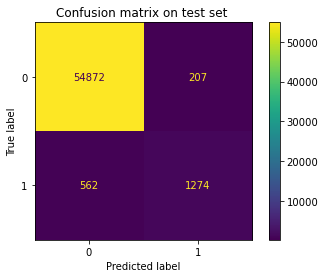

In [19]:
print("f1-score on train set : ", f1_score(y_train, y_train_pred));

cm = plot_confusion_matrix(classifierlog, X_train, y_train)
cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph

print("f1-score on test set : ", f1_score(y_test, y_test_pred));

cm = plot_confusion_matrix(classifierlog, X_test, y_test)
cm.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph


In [20]:
print("f1-score on train set : ", f1_score(y_train, y_train_pred))
print("f1-score on test set : ", f1_score(y_test, y_test_pred))


f1-score on train set :  0.762170729866405
f1-score on test set :  0.768164003617727


Conclusion: f1-score 0.76 pour le train et le test (pas d'overfitting) pour la logistic regression. Mais cela reste passable.

## 1-f) Essai d'amélioration du F1 score


In [21]:
# Training model 
print("Training model...")
classifierlog2 = LogisticRegression(random_state = 0,class_weight= {0:6,1:10})# Instanciate model
classifierlog2.fit(X_train, y_train) # Fit model
print("...Done.")

Training model...
...Done.


In [22]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred2 = classifierlog2.predict(X_train)
print("...Done.")
print()

Predictions on train set...
...Done.



In [23]:
# Predictions on training set
print("Predictions on test set...")
y_test_pred2 = classifierlog2.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



f1-score on train set :  0.7689822294022617


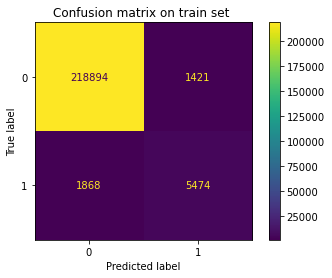

f1-score on test set :  0.7692742163230726


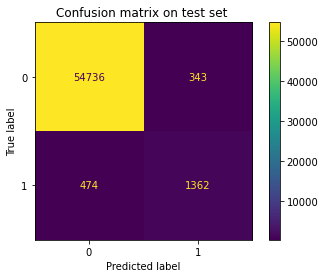

In [24]:
print("f1-score on train set : ",f1_score(y_train, y_train_pred2));

cm = plot_confusion_matrix(classifierlog2, X_train, y_train)
cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph

print("f1-score on test set : ", f1_score(y_test, y_test_pred2));

cm = plot_confusion_matrix(classifierlog2, X_test, y_test)
cm.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph


In [25]:
print("f1-score on train set : ", f1_score(y_train, y_train_pred2))
print("f1-score on test set : ", f1_score(y_test, y_test_pred2))


f1-score on train set :  0.7689822294022617
f1-score on test set :  0.7692742163230726


Conclusion: pas d'amélioration de f1-score mais on a une meilleure prédiction sur de la  target 1 qui représente le taux de conversion.

# 2) Amélioration du F1 score - Révision du pré-processing de la data

## 2-a) Nettoyage des outliers présente dans la data

In [26]:
conversion_train = conversion_train[conversion_train.age< 52]
conversion_train = conversion_train[conversion_train.total_pages_visited<24]
conversion_train_0 = conversion_train[(conversion_train.total_pages_visited<13) &(conversion_train.converted == 0)]
conversion_train_1 = conversion_train[(conversion_train.age< 45) &(conversion_train.converted == 1)]
conversion_train_1=conversion_train_1[(conversion_train_1.total_pages_visited>4) &(conversion_train_1.converted == 1)]
conversion_train = pd.concat([conversion_train_0,conversion_train_1])


In [27]:
conversion_train

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0
5,US,29,0,Seo,7,0
...,...,...,...,...,...,...
284434,US,22,0,Direct,23,1
284464,US,23,0,Seo,15,1
284486,US,32,0,Seo,21,1
284563,Germany,40,1,Seo,13,1


In [28]:
conversion_train.shape

(278600, 6)

## 2-b) Visualisation graphique des données après le cleaning approndie

In [29]:
import seaborn as sns



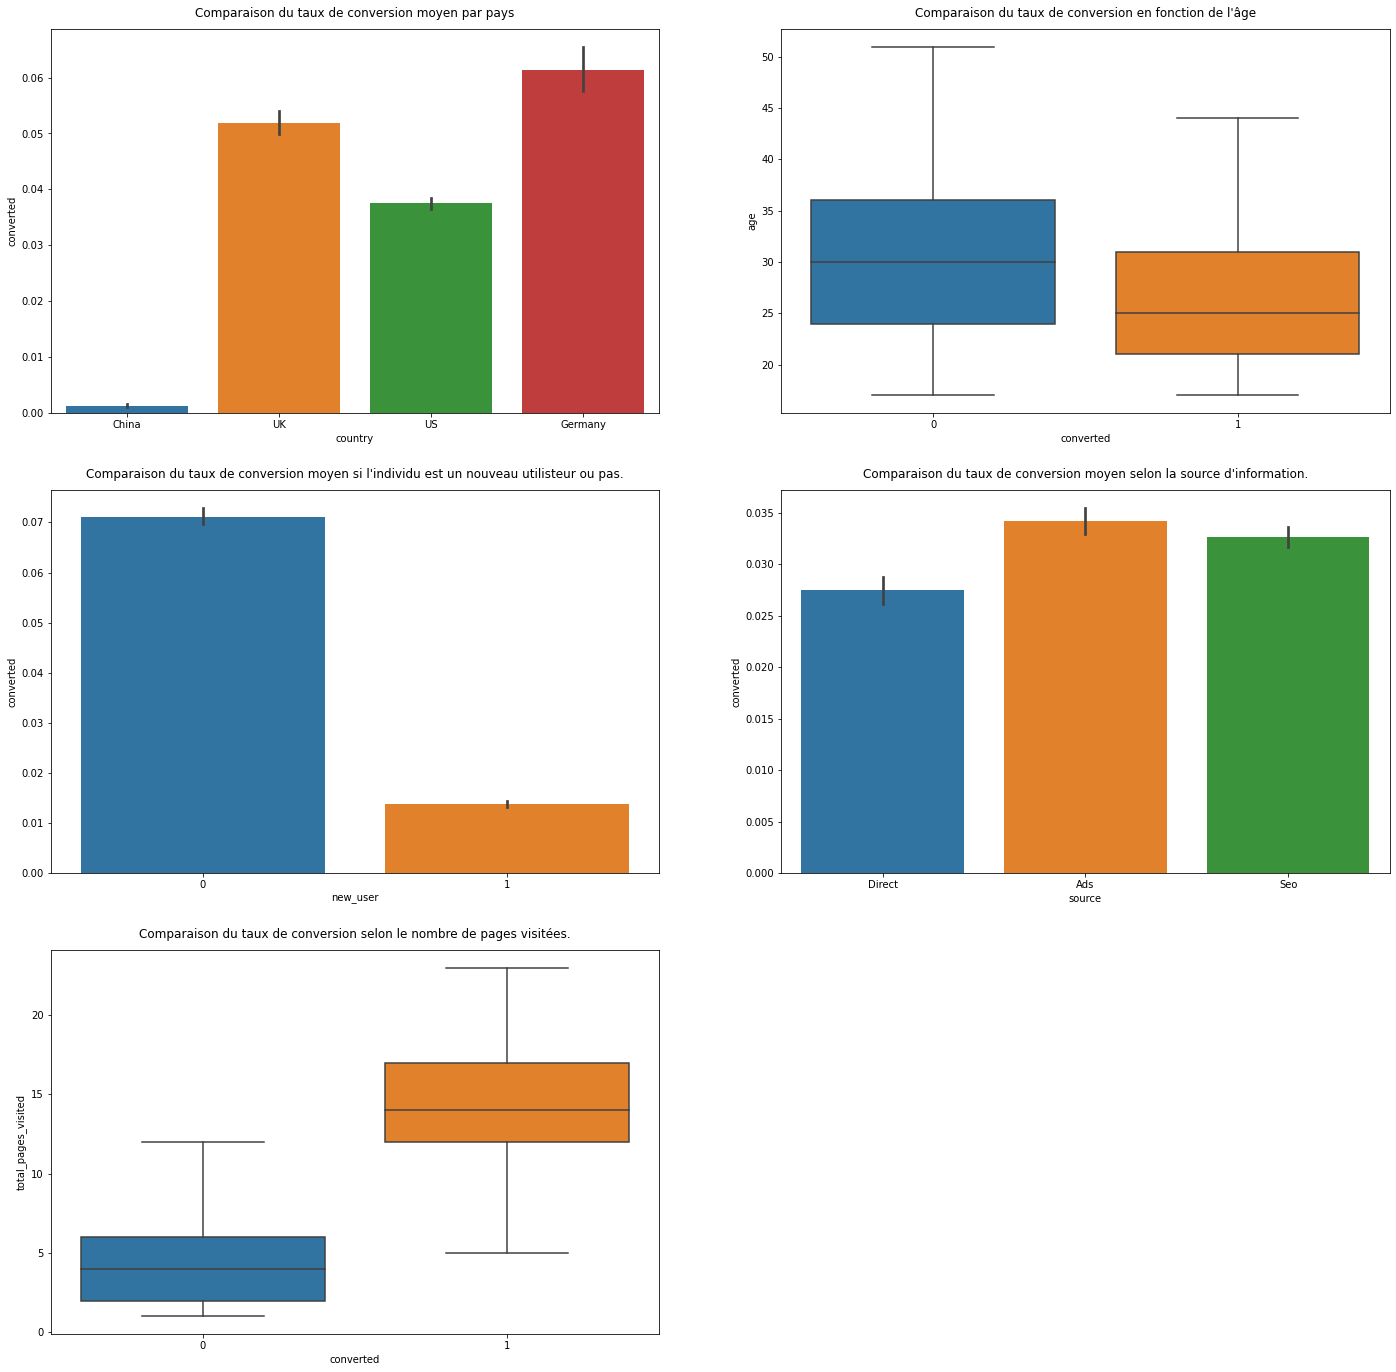

In [30]:
plt.figure(figsize = (24, 24))

plt.subplot(3,2,1)

plt.title("Comparaison du taux de conversion moyen par pays", pad = 12)

sns.barplot(data = conversion_train, x = "country", y = "converted")

plt.subplot(3,2,2)

plt.title("Comparaison du taux de conversion en fonction de l'âge", pad = 12)

sns.boxplot(data = conversion_train, y = "age", x = "converted")

plt.subplot(3,2,3)

plt.title("Comparaison du taux de conversion moyen si l'individu est un nouveau utilisteur ou pas.", pad = 12)

sns.barplot(data = conversion_train, x= "new_user", y = "converted")


plt.subplot(3,2,4)

plt.title("Comparaison du taux de conversion moyen selon la source d'information.", pad = 12)

sns.barplot(data = conversion_train, x= "source", y = "converted")


plt.subplot(3,2,5)

plt.title("Comparaison du taux de conversion selon le nombre de pages visitées.", pad = 12)

sns.boxplot(data = conversion_train, y= "total_pages_visited", x = "converted");


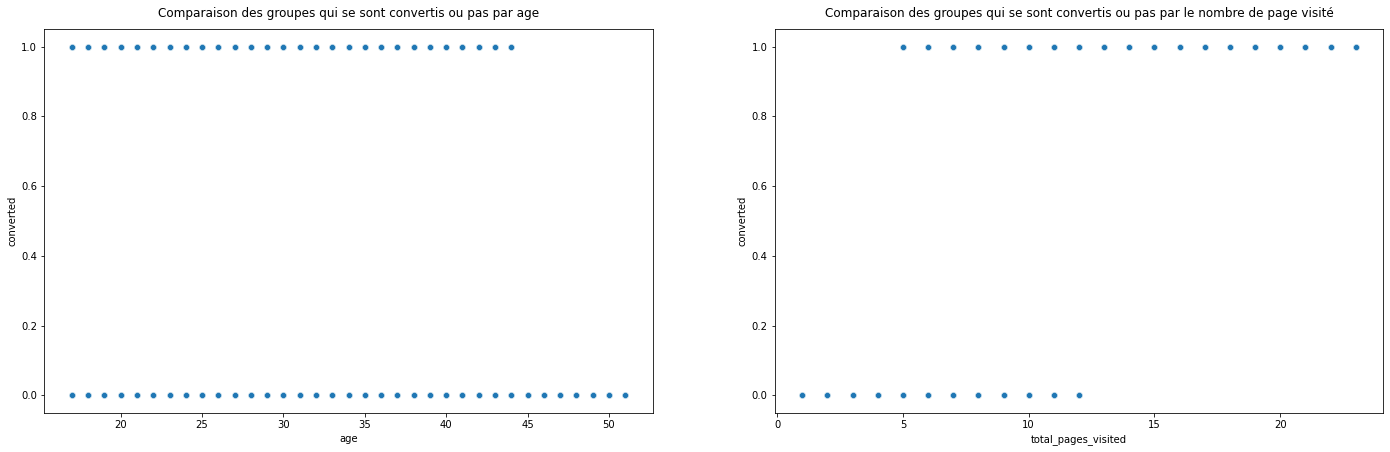

In [31]:
plt.figure(figsize = (24, 24))

plt.subplot(3,2,1)

plt.title("Comparaison des groupes qui se sont convertis ou pas par age", pad = 12)

sns.scatterplot(data = conversion_train, x = "age", y = "converted")


plt.subplot(3,2,2)

plt.title("Comparaison des groupes qui se sont convertis ou pas par le nombre de page visité", pad = 12)

sns.scatterplot(data = conversion_train, x = "total_pages_visited", y = "converted");






## 2-c Modèle de machine learning 

### Séparation des X et y

In [32]:
name = conversion_train.columns[0:5]

X2 = conversion_train.loc[:,name]
y2 = conversion_train.loc[:,"converted"]
#n= [n for n in name if n!= "age"]


In [33]:
name

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')

### Séparation Train et test

In [34]:
print("Splitting dataset into train set and test set...")

## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=y2) # Allows you to stratify your sample. 
                                                                # Meaning, you will have the same
                                                                # proportion of categories in test 
                                                                # and train set

print("...Done.")                                                                


Splitting dataset into train set and test set...
...Done.


In [35]:
y_train.value_counts()

0    215775
1      7105
Name: converted, dtype: int64

In [36]:
y_test.value_counts()

0    53944
1     1776
Name: converted, dtype: int64

###  Traitement en langage numérique X train et y train

In [37]:
# Encoding categorical features and standardizing numeric features
print("Encoding categorical features and standardizing numerical features...")
print()

numeric_features = [1,4]
numeric_transformer = StandardScaler()

categorical_features = [0,2,3]# sans la source
categorical_transformer = OneHotEncoder() # ne pas mettre de drop "First" car donne des résultats très mauvais

feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
print("...Done.")
print(X_train[:5]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()

Encoding categorical features and standardizing numerical features...

...Done.
[[ 0.          0.          1.          0.          1.          0.
   0.          0.          1.         -0.92200379 -0.24391459]
 [ 0.          0.          1.          0.          0.          1.
   1.          0.          0.         -1.04886528 -1.17478366]
 [ 0.          0.          0.          1.          0.          1.
   0.          1.          0.         -1.42944975 -1.17478366]
 [ 0.          0.          0.          1.          1.          0.
   0.          0.          1.          1.74208751 -0.86449397]
 [ 1.          0.          0.          0.          0.          1.
   0.          0.          1.          0.09288813 -0.24391459]]



In [38]:
# Encoding labels
print("Encoding labels...")
print(y_train)
print()
labelencoder = LabelEncoder()
Y_train = labelencoder.fit_transform(y_train)
print("...Done.")
print(Y_train[:5]) # print first 5 rows (not using iloc since now y_train became a numpy array)
print()

Encoding labels...
117856    0
100180    0
264286    0
162178    0
56686     0
         ..
58183     0
127638    0
252081    0
112031    0
159547    1
Name: converted, Length: 222880, dtype: int64

...Done.
[0 0 0 0 0]



### Traitement en langague numérique pour X_test

In [39]:
### Test pipeline ###
print("--- Test pipeline ---")

# Missing values
print("Imputing missing values...")
print(X_test)
print()
X_test = X_test.copy() # Copy dataset to avoid caveats of assign a copy of a slice of a DataFrame
                        # More info here https://towardsdatascience.com/explaining-the-settingwithcopywarning-in-pandas-ebc19d799d25
    
    
    
# Encoding categorical features and standardizing numeric features
print("Encoding categorical features and standardizing numerical features...")
print()

X_test = feature_encoder.transform(X_test)
print("...Done.")
print(X_test)
print()

--- Test pipeline ---
Imputing missing values...
       country  age  new_user  source  total_pages_visited
2376        US   43         0  Direct                    3
5971        US   32         1     Ads                    3
141295      US   30         0     Seo                    5
157359      UK   24         1     Ads                    8
195633      US   48         1     Seo                    2
...        ...  ...       ...     ...                  ...
232567      UK   29         0  Direct                    6
147578      US   37         1     Seo                    4
229255      US   30         1     Seo                    6
12101       US   27         1     Ads                    2
29577       US   22         1  Direct                    3

[55720 rows x 5 columns]

Encoding categorical features and standardizing numerical features...

...Done.
[[ 0.          0.          0.         ...  0.          1.61522602
  -0.55420428]
 [ 0.          0.          0.         ...  0.          

# LogisticRegression au gridsearch

In [103]:
from sklearn.model_selection import cross_val_score, GridSearchCV
print("Grid search...")

classifierl = LogisticRegression(random_state = 0,penalty = "elasticnet",solver ="saga",class_weight= {0:6,1:10}) 
#classifierl = LogisticRegression(random_state = 0,class_weight= {0:6,1:10}) 
# Grid of values to be tested
params = {
    'l1_ratio': [ a for a in  np.arange(0,1,0.1)],
    'C': [ a for a in  np.arange(0,2,0.1)]
}
gridsearchlog = GridSearchCV(classifierl, param_grid = params, cv = 3, scoring = "f1") # cv : the number of folds to be used for CV
gridsearchlog.fit(X_train, y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearchlog.best_params_)
print("Best F1 score : ", gridsearchlog.best_score_)

Grid search...


C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:795: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1. / C) * (1 - l1_ratio)
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:796: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1. / C) * l1_ratio
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:796: RuntimeWarning: invalid value encountered in double_scalars
  beta = (1. / C) * l1_ratio
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:305: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vanes\anaconda3\lib\site-packages\sk

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:795: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1. / C) * (1 - l1_ratio)
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:796: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1. / C) * l1_ratio
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:305: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vanes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vanes\anaconda3\lib\site-packages\skl

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:795: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1. / C) * (1 - l1_ratio)
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:796: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1. / C) * l1_ratio
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:305: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vanes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vanes\anaconda3\lib\site-packages\skl

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:795: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1. / C) * (1 - l1_ratio)
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:796: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1. / C) * l1_ratio
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:305: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vanes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vanes\anaconda3\lib\site-packages\skl

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:795: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1. / C) * (1 - l1_ratio)
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:796: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1. / C) * l1_ratio
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:305: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vanes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vanes\anaconda3\lib\site-packages\skl

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:795: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1. / C) * (1 - l1_ratio)
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:796: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1. / C) * l1_ratio
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:305: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vanes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vanes\anaconda3\lib\site-packages\skl

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:795: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1. / C) * (1 - l1_ratio)
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:796: RuntimeWarning: divide by zero encountered in double_scalars
  beta = (1. / C) * l1_ratio
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:305: RuntimeWarning: invalid value encountered in double_scalars
  if step_size * alpha_scaled == 1:
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vanes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vanes\anaconda3\lib\site-packages\skl

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\vanes\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

...Done.
Best hyperparameters :  {'C': 0.1, 'l1_ratio': 0.0}
Best F1 score :  0.8289576999736935


In [40]:
# Training model 
print("Training model...")
classifierlog_opt = LogisticRegression(random_state = 0,penalty = "elasticnet",solver ="saga",class_weight= {0:6,1:10},l1_ratio= 0.0 ,C= 0.1) 
classifierlog_opt.fit(X_train, y_train) # Fit model
print("...Done.")

Training model...
...Done.


In [41]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred_log =classifierlog_opt.predict(X_train)
print("...Done.")
print()

Predictions on train set...
...Done.



In [42]:
# Predictions on training set
print("Predictions on test set...")
y_test_pred_log = classifierlog_opt.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



In [43]:
print("f1-score on train set : ", f1_score(y_train, y_train_pred_log))
print("f1-score on test set : ", f1_score(y_test, y_test_pred_log))

f1-score on train set :  0.8287446140363689
f1-score on test set :  0.8202280035077463


f1-score on train set :  0.8287446140363689


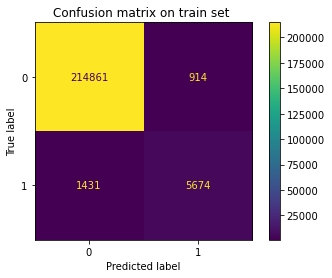

f1-score on test set :  0.8202280035077463


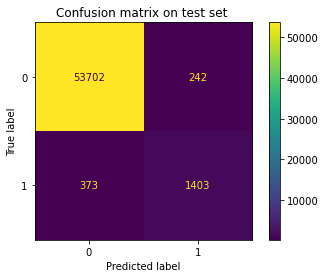

In [44]:
print("f1-score on train set : ", f1_score(y_train, y_train_pred_log));

cm = plot_confusion_matrix(classifierlog_opt, X_train, y_train)
cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph

print("f1-score on test set : ", f1_score(y_test, y_test_pred_log));

cm = plot_confusion_matrix(classifierlog_opt, X_test, y_test)
cm.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph

##### sur le train

In [45]:
from sklearn.model_selection import cross_val_score, GridSearchCV 

# Perform 3-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("5-fold cross-validation...")

cross_val_train_logistic = cross_val_score(classifierlog_opt, X_train, y_train, cv=5, scoring='f1')
print('The cross-validated f1-score is : ',  cross_val_train_logistic.mean())
print('The standard deviation is : ', cross_val_train_logistic.std())

5-fold cross-validation...
The cross-validated f1-score is :  0.8285501475039124
The standard deviation is :  0.004212923470267865


##### sur le test

In [46]:
# Perform 3-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("5-fold cross-validation...")

cross_val_test_logistic = cross_val_score(classifierlog_opt, X_test, y_test, cv=5, scoring='f1')
print('The cross-validated f1-score is : ',  cross_val_test_logistic.mean())
print('The standard deviation is : ', cross_val_test_logistic.std())

5-fold cross-validation...
The cross-validated f1-score is :  0.8204073826771212
The standard deviation is :  0.005045928343911737


##### sur l'ensemble de la dataset

In [47]:
# Perform 3-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("5-fold cross-validation...")

cross_val_dataset_logistic = cross_val_score(classifierlog_opt, feature_encoder.transform(X2), y2, cv=5, scoring='f1')
print('The cross-validated f1-score is : ', cross_val_dataset_logistic.mean())
print('The standard deviation is : ', cross_val_dataset_logistic.std())

5-fold cross-validation...
The cross-validated f1-score is :  0.8262957671559314
The standard deviation is :  0.008423987324963085


Conclusion la cross-validation confirme les résultats obtenu lors de la modelisation logistic regression. En effet, aussi bien que pour le train, le test, et l'ensemble de la dataset on obtient un f1 score 0.82 par cross validation, se qui est une bonne performence.

#### Présentation des features par le logistic regression

In [48]:
categorical_column_namesm = []

categorical_column_namesm1 = feature_encoder.transformers_[0][1].categories_

for l in categorical_column_namesm1 :
    for l1 in l:
        categorical_column_namesm.append(l1)
        

numerical_column_namesm = X2.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 


# Append all columns 
all_column_names = np.append(categorical_column_namesm,numerical_column_namesm)
print("All column names are: ",all_column_names)


All column names are:  ['China' 'Germany' 'UK' 'US' '0' '1' 'Ads' 'Direct' 'Seo' 'age'
 'total_pages_visited']


In [49]:
feature_importance_log = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients": classifierlog_opt.coef_[0] # CAREFUL HERE. We need to access first index of our list because 
                                            # Data need to be 1 dimensional
                                            # That's what .squeeze()
})

feature_importance_log

,feature_names,coefficients
0,China,-2.380467
1,Germany,1.005252
2,UK,0.881927
3,US,0.489843
4,0,0.850505
5,1,-0.853950
6,Ads,0.069150
7,Direct,-0.116665
8,Seo,0.044069
9,age,-0.616967


In [50]:
feature_importance_logf= feature_importance_log .copy()
feature_importance_logf=feature_importance_logf.sort_values(by="coefficients", ascending=False)
labels =feature_importance_logf.feature_names.tolist()
feature_importance_logf

,feature_names,coefficients
10,total_pages_visited,3.151390
1,Germany,1.005252
2,UK,0.881927
4,0,0.850505
3,US,0.489843
6,Ads,0.069150
8,Seo,0.044069
7,Direct,-0.116665
9,age,-0.616967
5,1,-0.853950


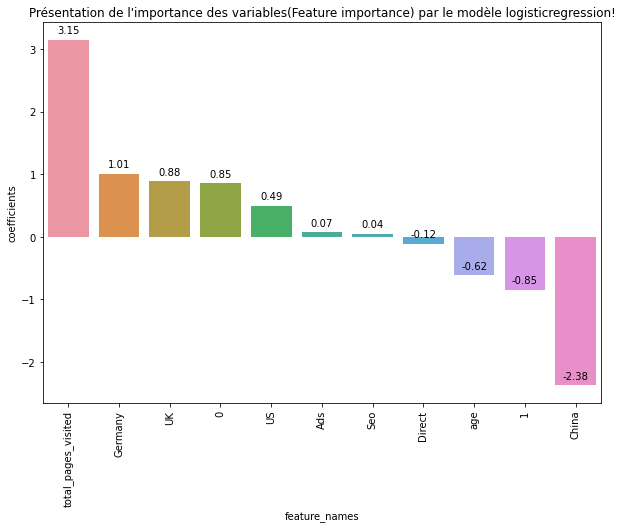

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))


# Visualize ranked features using seaborn
#sns.catplot(x="feature_names", 
            #y="coefficients", 
            #data=feature_importance.sort_values(by="coefficients", ascending=False), 
            #kind="bar",
            #aspect=16/9) # Resize graph

c = sns.barplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance_logf)

c.set_title("Présentation de l'importance des variables(Feature importance) par le modèle logisticregression!")

for bar in c.patches:  
  
    c.annotate(format(bar.get_height(), '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=10, xytext=(0, 9.5), 
                   textcoords='offset points') 
    
c.set_xticklabels(labels, rotation = 90);

# Random Forest au gridsearch

In [48]:
from sklearn.model_selection import cross_val_score, GridSearchCV
print("Grid search...")
regressor =  RandomForestClassifier(n_estimators = 100,random_state= 0) #min_samples_split =10 bon bon,40 bon

# Grid of values to be tested
params = {
    'min_samples_leaf': [ a for a in  np.arange(100,200,10)],
    "min_samples_split":[ a for a in  np.arange(10,50,10)],
    "max_depth":[ a for a in  np.arange(1,15,1)]# 0 corresponds to no regularization 45,70, 150
}
gridsearch1 = GridSearchCV(regressor, param_grid = params, cv = 3,scoring="f1") # cv : the number of folds to be used for CV
gridsearch1.fit(X_train, y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch1.best_params_)
print("Best f1-score : ", gridsearch1.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 14, 'min_samples_leaf': 130, 'min_samples_split': 10}
Best f1-score :  0.8392734235700049


# Application du random forest avec l'hyperparamètre optimiser

In [52]:
random = RandomForestClassifier(n_estimators = 100,random_state=0,max_depth=14, min_samples_leaf=130, min_samples_split=10) 
random.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, min_samples_leaf=130, min_samples_split=10,
                       random_state=0)

In [53]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred_random = random.predict(X_train)
print("...Done.")
print()

Predictions on train set...
...Done.



In [54]:
# Predictions on training set
print("Predictions on test set...")
y_test_pred_random = random.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



#### Matrice de confusion

accuracy-score on train set :  0.8429870751555768


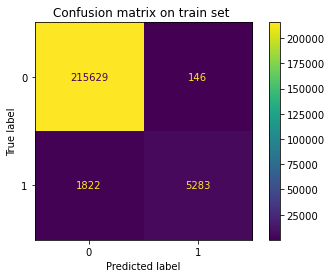

accuracy-score on test set :  0.831143864146107


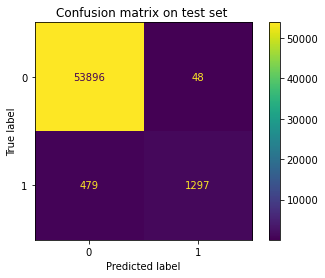

In [55]:
print("accuracy-score on train set : ", f1_score(y_train, y_train_pred_random))

cm = plot_confusion_matrix(random, X_train, y_train)
cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph

print("accuracy-score on test set : ",  f1_score(y_test, y_test_pred_random))

cm = plot_confusion_matrix(random, X_test, y_test)
cm.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph

#### Résultat du F1 score

In [56]:
print("f1-score on train set : ", f1_score(y_train, y_train_pred_random))
print("f1-score on test set : ", f1_score(y_test, y_test_pred_random))

f1-score on train set :  0.8429870751555768
f1-score on test set :  0.831143864146107


##### sur le train

In [57]:
from sklearn.model_selection import cross_val_score, GridSearchCV 

# Perform 3-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("5-fold cross-validation...")

cross_val_train_random = cross_val_score(random, X_train, y_train, cv=5, scoring='f1')
print('The cross-validated accuracy-score is : ',  cross_val_train_random.mean())
print('The standard deviation is : ', cross_val_train_random.std())

5-fold cross-validation...
The cross-validated accuracy-score is :  0.8372332733876313
The standard deviation is :  0.005511049471897124


##### sur le test

In [58]:
from sklearn.model_selection import cross_val_score, GridSearchCV 

# Perform 3-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("5-fold cross-validation...")

cross_val_test_random = cross_val_score(random, X_test, y_test, cv=5, scoring='f1')
print('The cross-validated accuracy-score is : ',  cross_val_test_random.mean())
print('The standard deviation is : ', cross_val_test_random.std())

5-fold cross-validation...
The cross-validated accuracy-score is :  0.8140057396079701
The standard deviation is :  0.00447989887049971


##### sur l'ensemble de la dataset

In [59]:
# Perform 3-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("5-fold cross-validation...")

cross_val_dataset_random = cross_val_score(random, feature_encoder.transform(X2), y2, cv=5, scoring='f1')
print('The cross-validated f1-score is : ', cross_val_dataset_random.mean())
print('The standard deviation is : ', cross_val_dataset_random.std())

5-fold cross-validation...
The cross-validated f1-score is :  0.8379439115134641
The standard deviation is :  0.009203031942080954


# SDG classifier

In [60]:
from sklearn.linear_model import SGDClassifier

classifier_sdg2 = SGDClassifier(random_state = 0,class_weight= {0:10,1:19},penalty = "l1", alpha=0.000052)

classifier_sdg2.fit(X_train, y_train)


SGDClassifier(alpha=5.2e-05, class_weight={0: 10, 1: 19}, penalty='l1',
              random_state=0)

In [61]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred_sdg2 = classifier_sdg2.predict(X_train)
print("...Done.")
print()

Predictions on train set...
...Done.



In [62]:
# Predictions on training set
print("Predictions on test set...")
y_test_pred_sdg2 = classifier_sdg2.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



#### Matrice de confusion

accuracy-score on train set :  0.9893844221105528


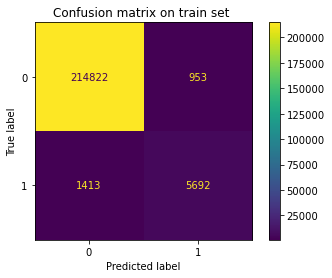

accuracy-score on test set :  0.9889447236180905


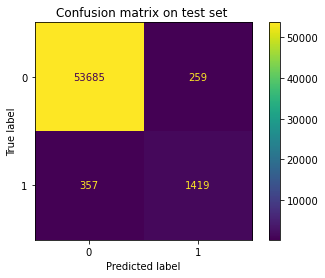

In [63]:
print("accuracy-score on train set : ", classifier_sdg2.score(X_train, y_train));

cm = plot_confusion_matrix(classifier_sdg2, X_train, y_train)
cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph

print("accuracy-score on test set : ",  classifier_sdg2.score(X_test, y_test));

cm = plot_confusion_matrix(classifier_sdg2, X_test, y_test)
cm.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph


#### Résultat du F1 score

In [64]:
print("f1-score on train set : ", f1_score(y_train, y_train_pred_sdg2))
print("f1-score on test set : ", f1_score(y_test, y_test_pred_sdg2))

f1-score on train set :  0.8279272727272728
f1-score on test set :  0.821656050955414


##### sur le train

In [65]:
from sklearn.model_selection import cross_val_score, GridSearchCV 

# Perform 3-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("5-fold cross-validation...")

cross_val_train_classifiersdg = cross_val_score(classifier_sdg2, X_train, y_train, cv=5, scoring='f1')
print('The cross-validated accuracy-score is : ',  cross_val_train_classifiersdg.mean())
print('The standard deviation is : ', cross_val_train_classifiersdg.std())

5-fold cross-validation...
The cross-validated accuracy-score is :  0.7785387398552026
The standard deviation is :  0.0153264152759025


##### sur le test

In [66]:
from sklearn.model_selection import cross_val_score, GridSearchCV 

# Perform 3-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("5-fold cross-validation...")

cross_val_test_classifiersdg = cross_val_score(classifier_sdg2, X_test, y_test, cv=5, scoring='f1')
print('The cross-validated accuracy-score is : ',  cross_val_test_classifiersdg.mean())
print('The standard deviation is : ', cross_val_test_classifiersdg.std())

5-fold cross-validation...
The cross-validated accuracy-score is :  0.7970550266274976
The standard deviation is :  0.021817786287971867


##### sur l'ensemble de la dataset

In [67]:
# Perform 3-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("5-fold cross-validation...")

cross_val_dataset_classifiersdg= cross_val_score(classifier_sdg2, feature_encoder.transform(X2), y2, cv=5, scoring='f1')
print('The cross-validated f1-score is : ', cross_val_dataset_classifiersdg.mean())
print('The standard deviation is : ', cross_val_dataset_classifiersdg.std())

5-fold cross-validation...
The cross-validated f1-score is :  0.7898693522941013
The standard deviation is :  0.028393399840345675


### Tableau récautilatif

In [68]:
#Tableau récap
#f1_score(y_train, y_train_pred)
#f1_score(y_test, y_test_pred)
ind=['Logistic regression base (outliers)','Logistic regression(clean)','Randomforest (clean)','SGDClassifier(clean)']
data={'f1 score train':[0.768,f1_score(y_train, y_train_pred_log),f1_score(y_train, y_train_pred_random),
                        f1_score(y_train, y_train_pred_sdg2)],
      "f1 score test":[0.769,f1_score(y_test, y_test_pred_log),f1_score(y_test, y_test_pred_random) ,f1_score(y_test, y_test_pred_sdg2)],
     "cross validation train": ["",cross_val_train_logistic.mean(),cross_val_train_random.mean(),cross_val_train_classifiersdg.mean()],
     "cross validation test":["",cross_val_test_logistic.mean(),cross_val_test_random.mean(),cross_val_test_classifiersdg.mean()],
     "cross validation dataset":["",cross_val_dataset_logistic.mean(),cross_val_dataset_random.mean(),cross_val_dataset_classifiersdg.mean()]}
result=pd.DataFrame(data=data,index=ind)
result

,f1 score train,f1 score test,cross validation train,cross validation test,cross validation dataset
Logistic regression base (outliers),0.768000,0.769000,,,
Logistic regression(clean),0.828745,0.820228,0.82855,0.820407,0.826296
Randomforest (clean),0.842987,0.831144,0.837233,0.814006,0.837944
SGDClassifier(clean),0.827927,0.821656,0.778539,0.797055,0.789869


## Conclusion choix du modèle

Conclusion, je choisirais la logistic regression car il donne des résultats corrects avec un  f1-score 0.82 pour le train/test sans overfitting, contrairement au random forest. Et ce modèle présente une bonne performence confirmer par la cross validation, alors que le sdg classifier n'est pas bon sur la cross-validation.


# Présentation des features importance

In [69]:
categorical_column_namesm = []

categorical_column_namesm1 = feature_encoder.transformers_[0][1].categories_

for l in categorical_column_namesm1 :
    for l1 in l:
        categorical_column_namesm.append(l1)
        

numerical_column_namesm = X2.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 


# Append all columns 
all_column_names = np.append(categorical_column_namesm,numerical_column_namesm)
print("All column names are: ",all_column_names)


All column names are:  ['China' 'Germany' 'UK' 'US' '0' '1' 'Ads' 'Direct' 'Seo' 'age'
 'total_pages_visited']


In [70]:
# Print numerical columns
numerical_column_namesm = X2.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_namesm)


numerical columns are:  Index(['age', 'total_pages_visited'], dtype='object')


In [71]:
# Append all columns 
all_column_names = np.append(categorical_column_namesm,numerical_column_namesm)
print("All column names are: ",all_column_names)

All column names are:  ['China' 'Germany' 'UK' 'US' '0' '1' 'Ads' 'Direct' 'Seo' 'age'
 'total_pages_visited']


In [72]:
feature_importance_log = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients": classifierlog_opt.coef_[0] # CAREFUL HERE. We need to access first index of our list because 
                                            # Data need to be 1 dimensional
                                            # That's what .squeeze()
})

feature_importance_log

,feature_names,coefficients
0,China,-2.380467
1,Germany,1.005252
2,UK,0.881927
3,US,0.489843
4,0,0.850505
5,1,-0.853950
6,Ads,0.069150
7,Direct,-0.116665
8,Seo,0.044069
9,age,-0.616967


In [73]:
feature_importance_logf= feature_importance_log .copy()
feature_importance_logf=feature_importance_logf.sort_values(by="coefficients", ascending=False)
labels =feature_importance_logf.feature_names.tolist()
feature_importance_logf

,feature_names,coefficients
10,total_pages_visited,3.151390
1,Germany,1.005252
2,UK,0.881927
4,0,0.850505
3,US,0.489843
6,Ads,0.069150
8,Seo,0.044069
7,Direct,-0.116665
9,age,-0.616967
5,1,-0.853950


In [74]:
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients": classifier_sdg2.coef_[0] # CAREFUL HERE. We need to access first index of our list because 
                                            # Data need to be 1 dimensional
                                            # That's what .squeeze()
})

feature_importance

,feature_names,coefficients
0,China,-1.795397
1,Germany,0.000000
2,UK,0.000000
3,US,-0.044979
4,0,0.000000
5,1,-1.132357
6,Ads,0.000000
7,Direct,0.000000
8,Seo,0.000000
9,age,-0.484382


In [75]:
feature_importance1= feature_importance .copy()
feature_importance1=feature_importance1.sort_values(by="coefficients", ascending=False)
labels1 = feature_importance1.feature_names.tolist()
feature_importance1

,feature_names,coefficients
10,total_pages_visited,2.151600
1,Germany,0.000000
2,UK,0.000000
4,0,0.000000
6,Ads,0.000000
7,Direct,0.000000
8,Seo,0.000000
3,US,-0.044979
9,age,-0.484382
5,1,-1.132357


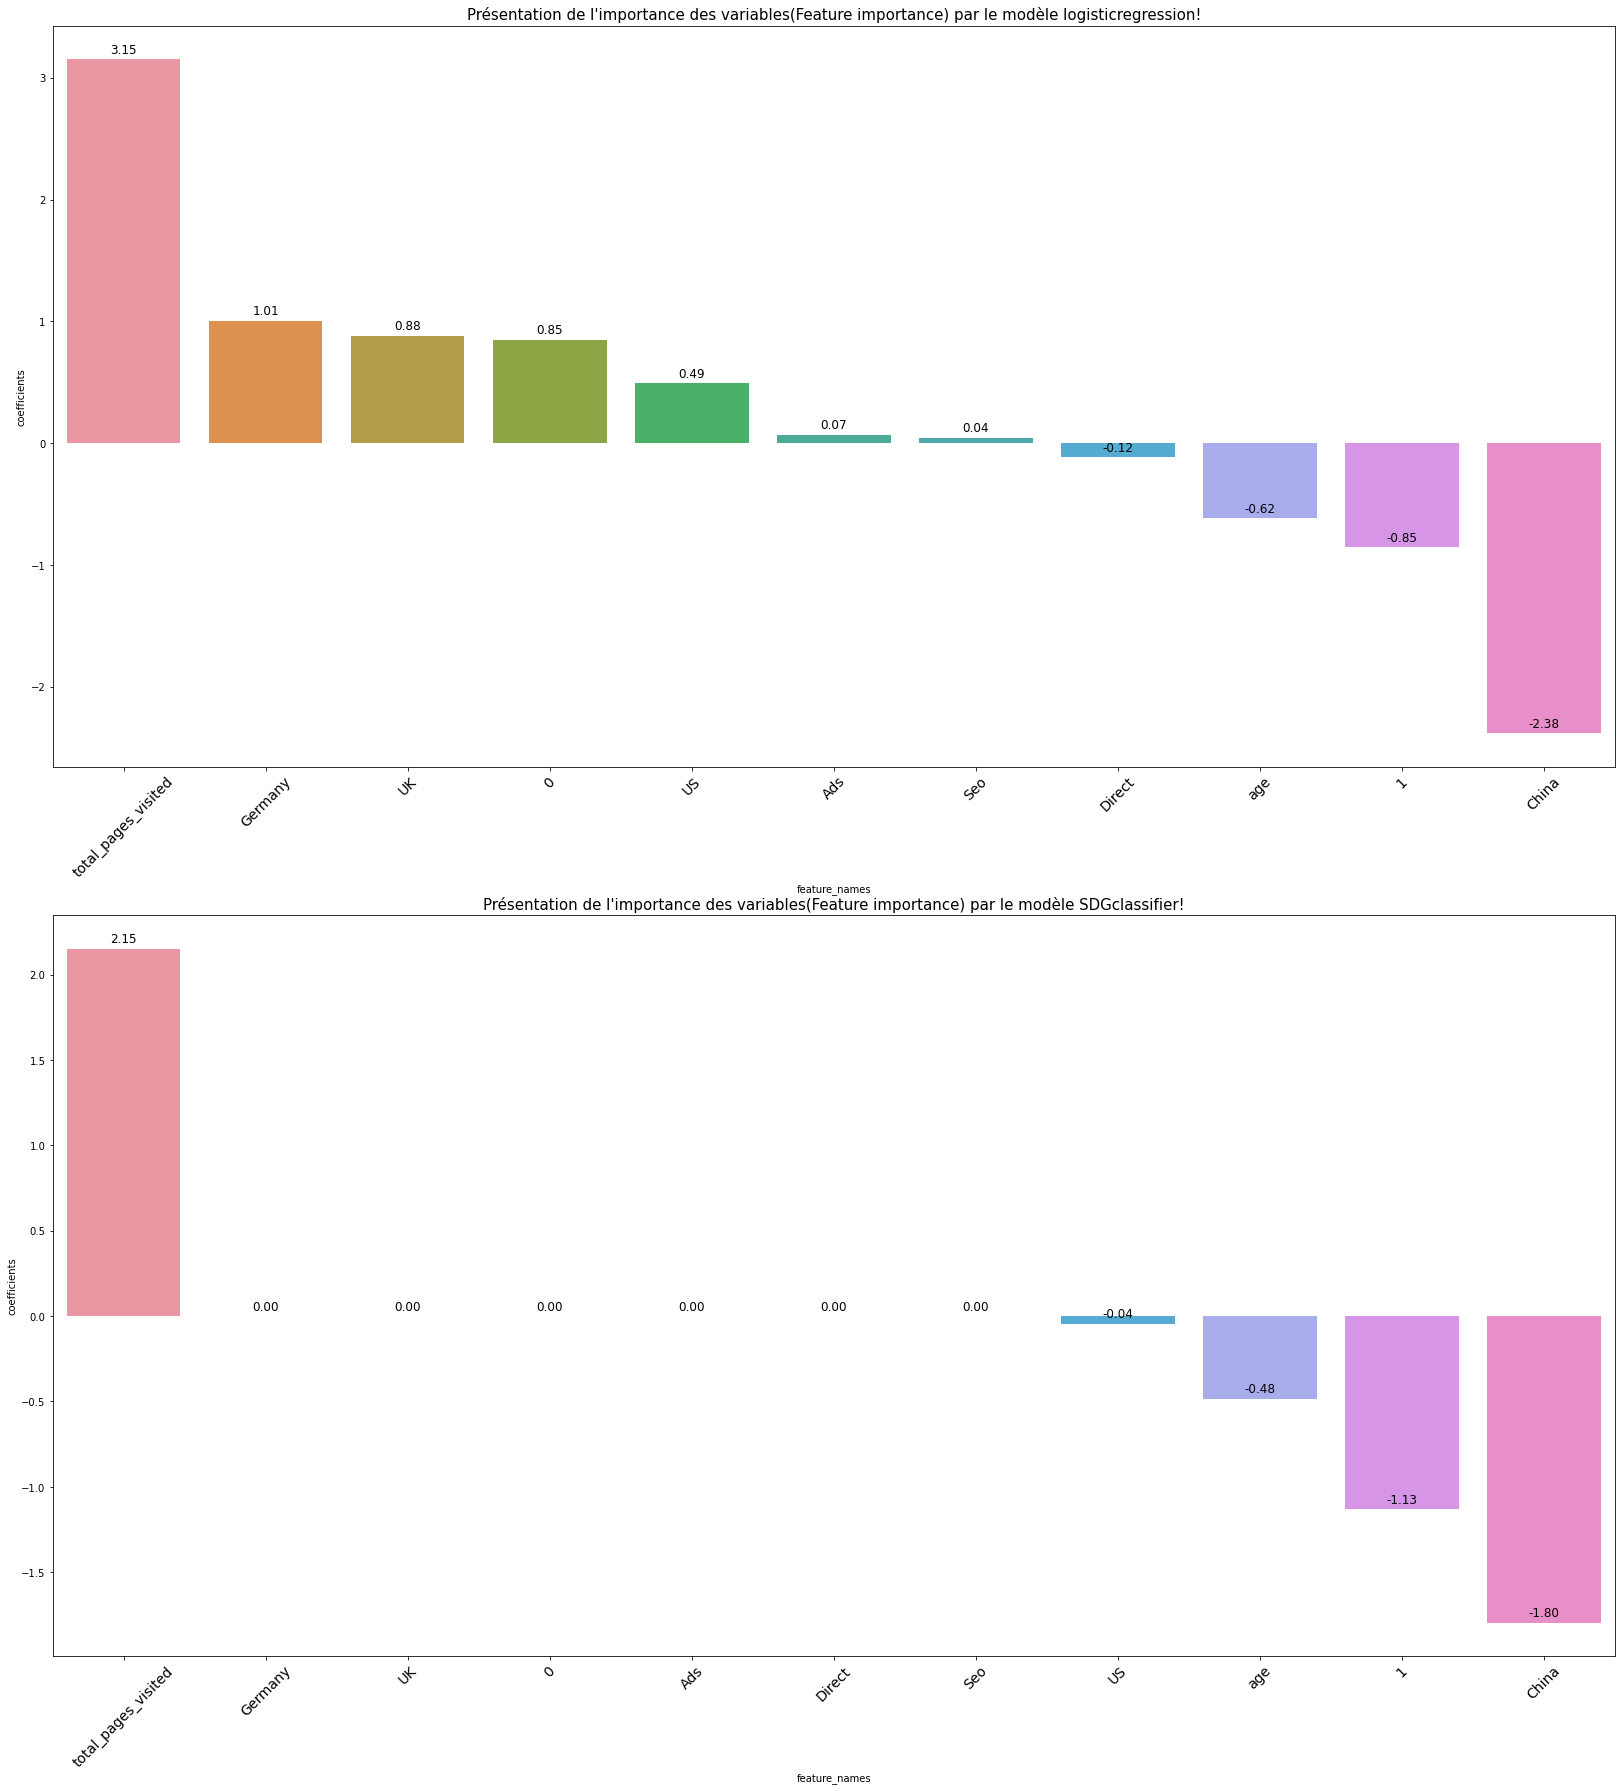

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize = (28, 30))

plt.subplot(2,1,1)

#plt.figure(figsize = (10,7))


# Visualize ranked features using seaborn
#sns.catplot(x="feature_names", 
            #y="coefficients", 
            #data=feature_importance.sort_values(by="coefficients", ascending=False), 
            #kind="bar",
            #aspect=16/9) # Resize graph

c = sns.barplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance_logf)

c.set_title("Présentation de l'importance des variables(Feature importance) par le modèle logisticregression!", size = 15)

for bar in c.patches:  
  
    c.annotate(format(bar.get_height(), '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=12, xytext=(0, 9.5), 
                   textcoords='offset points') 
    
c.set_xticklabels(labels, rotation = 45, size = 14);

plt.subplot(2,1,2)



c = sns.barplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance1)

c.set_title("Présentation de l'importance des variables(Feature importance) par le modèle SDGclassifier!",size = 15)

for bar in c.patches:  
  
    c.annotate(format(bar.get_height(), '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=12, xytext=(0, 9.5), 
                   textcoords='offset points') 
    
c.set_xticklabels(labels1, rotation = 45, size = 14);

# Prediction

In [77]:
test = pd.read_csv("conversion_data_test.csv")
test

,country,age,new_user,source,total_pages_visited
0,UK,28,0,Seo,16
1,UK,22,1,Direct,5
2,China,32,1,Seo,1
3,US,32,1,Ads,6
4,China,25,0,Seo,3
...,...,...,...,...,...
31615,Germany,25,1,Seo,3
31616,US,36,1,Ads,7
31617,UK,33,1,Seo,5
31618,UK,25,1,Seo,14


In [78]:
dico_isnull_test = {c : len(test[test[c].isnull()== True]) for c in test.columns}
dico_isnull_test

{'country': 0, 'age': 0, 'new_user': 0, 'source': 0, 'total_pages_visited': 0}

###  3-a)Prétraitement de la dataset test

In [79]:
test_encoded = feature_encoder.transform(test)

In [80]:
test_encoded

array([[ 0.        ,  0.        ,  1.        , ...,  1.        ,
        -0.28769634,  3.47956168],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
        -1.04886528,  0.0663751 ],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.21974962, -1.17478366],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  1.        ,
         0.34661111,  0.0663751 ],
       [ 0.        ,  0.        ,  1.        , ...,  1.        ,
        -0.66828081,  2.8589823 ],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -1.04886528, -0.86449397]])

### 3-b) Prediction par les modèles du label 'converted' par la logistic regression 

In [82]:
test["converted_by_logistic_regression"] = classifierlog_opt.predict(test_encoded)

In [83]:
test.converted_by_logistic_regression.value_counts()

0    30526
1     1094
Name: converted_by_logistic_regression, dtype: int64

In [84]:
test

,country,age,new_user,source,total_pages_visited,converted_by_logistic_regression
0,UK,28,0,Seo,16,1
1,UK,22,1,Direct,5,0
2,China,32,1,Seo,1,0
3,US,32,1,Ads,6,0
4,China,25,0,Seo,3,0
...,...,...,...,...,...,...
31615,Germany,25,1,Seo,3,0
31616,US,36,1,Ads,7,0
31617,UK,33,1,Seo,5,0
31618,UK,25,1,Seo,14,1


In [85]:

test.to_csv('conversion_data_test_predictions.csv', index=False)
